# Sentiment Analysis with Traditional Machine Learning Models

This notebook explores applying traditional machine learning models to sentiment analysis on tweets, aiming to classify them into positive or negative sentiments using a preprocessed dataset. The focus is on comparing the performance of three models: Logistic Regression, Linear Support Vector Classification (LinearSVC), and Bernoulli Naive Bayes, to identify the most effective approach for this task.

Feature extraction techniques, specifically TF-IDF vectorization, are used to convert text data into a format that the models can process. Additionally, TextBlob serves as a baseline for quick sentiment analysis, with its accuracy evaluated against the labeled dataset.

The process outlined includes data preparation, model training, performance evaluation, and saving the models for future use. This project aims to provide insights into the effectiveness of traditional machine learning methods in handling sentiment analysis in social media contexts.



In [1]:
import os
import sys
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB

from joblib import load, dump
from textblob import TextBlob

# Importing local modules from src folder
src_dir = os.path.join(os.getcwd(), '..', 'src')
if src_dir not in sys.path:
    sys.path.append(src_dir)

from text_utils import preprocess_text
from model_utils import plot_cf_matrix, evaluate, predict_sentiment

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aaron\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aaron\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
# Data loading
csv_file_path = '../data/processed/preprocessed_tweets.csv'
df = pd.read_csv(csv_file_path)

## Data Preparation

Tweet data and sentiment labels are prepared for modeling by splitting them into training and testing sets.


In [3]:
X = df['tweet']  # Features: tweet texts
y = df['sentiment']  # Labels: sentiments

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=0)

## Feature Extraction with TF-IDF

Applying TF-IDF vectorization to convert tweets into numerical features, using bigrams and limiting to 500,000 features for efficiency.

In [4]:
# Applying TF-IDF vectorization to transform the text data into numerical features that machine learning models can process.
vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=500000, stop_words='english')
vectorizer.fit(X_train)

# Transform data to matrix
X_train_vec = vectorizer.transform(X_train)
X_test_vec = vectorizer.transform(X_test)

## Model Prototyping
Will experiment with different models to find the most promising one.

Models to try:
1. Logistic Regression
2. LinearSVC
3. Bernoulli Naive Bayes

### 1. Logistic Regression Model

Training a Logistic Regression model for sentiment classification. Hyperparameters are tuned for optimal performance.


In [5]:
# Logistic regression model
LR_model = LogisticRegression(C=2, max_iter=1000, n_jobs=-1)
LR_model.fit(X_train_vec, y_train)

LogisticRegression(C=2, max_iter=1000, n_jobs=-1)

### 2. LinearSVC Model

Training a Linear Support Vector Classification model. The `dual=False` parameter is set for better performance with high-dimensional data.


In [6]:
# LinearSVC model
SVC_model = LinearSVC(dual=False)
SVC_model.fit(X_train_vec, y_train)

LinearSVC(dual=False)

### 3. Bernoulli Naive Bayes Model

Training a Bernoulli Naive Bayes model, a good baseline for text classification tasks.


In [7]:
# Bernoulli Naive Bayes model
BNB_model = BernoulliNB()
BNB_model.fit(X_train_vec, y_train)

BernoulliNB()

## Model Evaluation

Evaluating the performance of Logistic Regression, LinearSVC, and Bernoulli Naive Bayes models using confusion matrices along with precision, recall, and F1-score metrics.


Logistic Regression Model Evaluation
              precision    recall  f1-score   support

           0       0.80      0.77      0.79     39821
           1       0.78      0.81      0.79     40163

    accuracy                           0.79     79984
   macro avg       0.79      0.79      0.79     79984
weighted avg       0.79      0.79      0.79     79984



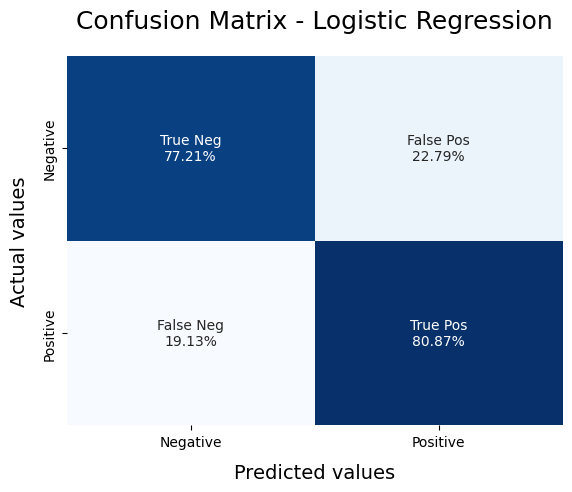

LinearSVC Model Evaluation
              precision    recall  f1-score   support

           0       0.78      0.76      0.77     39821
           1       0.77      0.79      0.78     40163

    accuracy                           0.78     79984
   macro avg       0.78      0.78      0.78     79984
weighted avg       0.78      0.78      0.78     79984



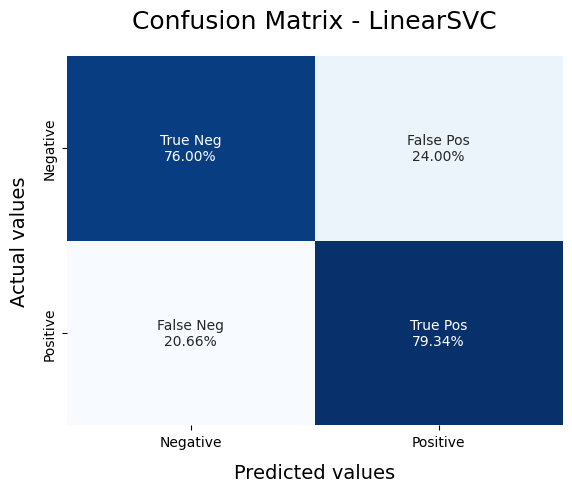

Bernoulli Naive bayes Model Evaluation
              precision    recall  f1-score   support

           0       0.78      0.77      0.78     39821
           1       0.77      0.79      0.78     40163

    accuracy                           0.78     79984
   macro avg       0.78      0.78      0.78     79984
weighted avg       0.78      0.78      0.78     79984



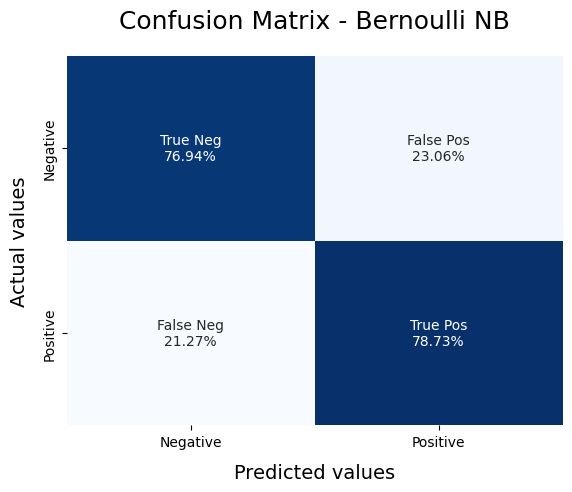

In [8]:
# Evaluating the models
print("Logistic Regression Model Evaluation")
evaluate(LR_model, X_test_vec, y_test, "Logistic Regression")

print("LinearSVC Model Evaluation")
evaluate(SVC_model, X_test_vec, y_test, "LinearSVC")

print("Bernoulli Naive bayes Model Evaluation")
evaluate(BNB_model, X_test_vec, y_test, "Bernoulli NB")

The <b>logistic progression</b> model produces the most accurate results, at 79% accuracy. However, the other models are not far behind.

## Sentiment Prediction with TextBlob

Using TextBlob for a quick sentiment analysis baseline. Evaluating its accuracy against our labeled dataset.


Accuracy: 62.64%


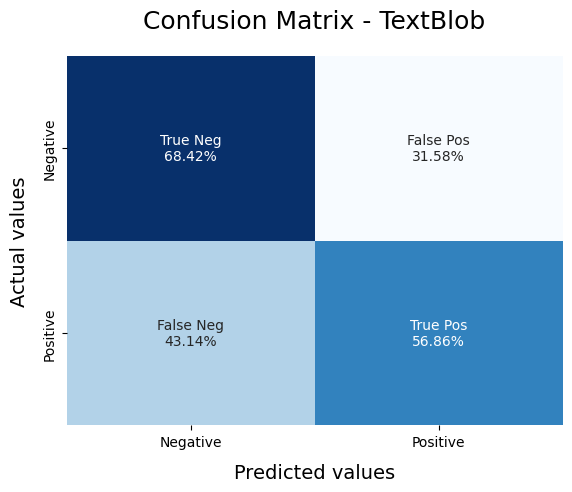

In [9]:
# Function to predict sentiment using TextBlob
def predict_sentiment_textblob(text):
    analysis = TextBlob(text)
    # Return 1 for positive sentiment, 0 for negative
    return 1 if analysis.sentiment.polarity > 0 else 0

df['predicted_sentiment'] = df['tweet'].apply(predict_sentiment_textblob)

accuracy = np.mean(df['predicted_sentiment'] == df['sentiment'])
print(f"Accuracy: {accuracy*100:.2f}%")

plot_cf_matrix(df['sentiment'],df['predicted_sentiment'], "TextBlob")

## Sample Tweet Classifications

Classifying a selection of tweets using the trained Logistic Regression model to observe its predictive performance on unseen data.


In [10]:
# Classifying tweets using this LR model.
texts = ["It's a new day in America",
            "hello literally everyone.",
            "Terrible news",
            "hollis death scene will hurt me severely to watch on film wry is director cut not out now",
            "this week is not going a had hoped"]

df = predict_sentiment(vectorizer, LR_model, texts)
print(df)

                                                text sentiment
0                          It's a new day in America  Positive
1                          hello literally everyone.  Positive
2                                      Terrible news  Negative
3  hollis death scene will hurt me severely to wa...  Negative
4                 this week is not going a had hoped  Negative


## Model Persistence

Saving the trained models and TF-IDF vectorizer to disk using Joblib for future use or deployment.


In [11]:
dump(vectorizer, '../models/vectorizer.joblib')
dump(LR_model, '../models/LR_model.joblib')
dump(SVC_model, '../models/SVC_model.joblib')
dump(BNB_model, '../models/BNB_model.joblib')

['../models/BNB_model.joblib']

## Key Findings

- Logistic Regression and LinearSVC displayed strong performance, with LR slightly edging out in accuracy.
- BernoulliNB, despite its simplicity, proved effective, underscoring the utility of Naive Bayes for text classification.
- The analysis reinforces the value of feature extraction, with TF-IDF significantly enhancing model capability.
